# **Project 3: Traffic Sign Recognition**

Hafiz Syed Sharjeel Najam

*Machine Learning Intern, Elevvo Pathways*

---

## Project Description
This project focuses on training a model about different traffic signs from images, just like how drivers read traffic signs on the road. Using thousands of real traffic sign pictures, the system was trained to automatically learn the shapes, colors, and patterns that make each sign unique.

Once trained, the system can look at a new picture of a traffic sign and correctly identify which type it is.

**For example**, a stop sign, speed limit, or pedestrian crossing.

**Accuracy** During testing, the system achieved about **99%** accuracy, meaning it gets the right answer almost every time.


**Industrial Use** The goal of this project is to show how technology can make roads safer. A system like this could be used in self-driving cars, driver assistance tools, or even smart road monitoring systems to quickly understand and react to traffic conditions.

# Setup and Download Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gtsrb-german-traffic-sign' dataset.
Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


# Separate the data in Data and Label arrays

In [3]:
classes = 43
data = []
labels = []
for i in range(classes):
    path = r'/kaggle/input/gtsrb-german-traffic-sign'
    path = f"{path}/Train/{i}"
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(f"{path}/{a}")
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

Streaming output truncated to the last 5000 lines.
35 00035_00002_00014.png
35 00035_00038_00013.png
35 00035_00027_00025.png
35 00035_00038_00019.png
35 00035_00016_00015.png
35 00035_00038_00024.png
35 00035_00029_00008.png
35 00035_00013_00027.png
35 00035_00002_00006.png
35 00035_00028_00016.png
35 00035_00013_00019.png
35 00035_00035_00016.png
35 00035_00023_00027.png
35 00035_00030_00004.png
35 00035_00024_00009.png
35 00035_00018_00023.png
35 00035_00005_00012.png
35 00035_00026_00013.png
35 00035_00012_00023.png
35 00035_00021_00000.png
35 00035_00036_00019.png
35 00035_00012_00022.png
35 00035_00036_00025.png
35 00035_00031_00028.png
35 00035_00008_00003.png
35 00035_00034_00011.png
35 00035_00006_00026.png
35 00035_00012_00021.png
35 00035_00030_00017.png
35 00035_00026_00020.png
35 00035_00038_00025.png
35 00035_00014_00028.png
35 00035_00026_00015.png
35 00035_00031_00001.png
35 00035_00034_00017.png
35 00035_00011_00004.png
35 00035_00000_00026.png
35 00035_00024_00012.png

In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
data.shape, labels.shape

((39209, 30, 30, 3), (39209,))

# Deep Learning and Model Training Steps

- Split the dataset into training and testing set using `train_test_split`.
- Build Convulational Model.
- Complied the model with `Adam` optimizer.
- Model is evaluated using `accuracy` metrics and plots between loss and accuracy.

## Divide the Data into Training and Testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## Building Sequential Model



In [76]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(30, 30, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.15),   # Dropout added

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.15),

    layers.Conv2D(32, (3, 3), activation="relu"),  # Increased depth for better features
    layers.BatchNormalization(),
    layers.Dropout(0.15),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),  # Bigger dense layer
    layers.BatchNormalization(),
    layers.Dropout(0.15),   # Strong dropout before final layer

    layers.Dense(43, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,251 (290.04 KB)

 Trainable params: 73,867 (288.54 KB)

 Non-trainable params: 384 (1.50 KB)

In [78]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [79]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5868 - loss: 1.4548 - val_accuracy: 0.9454 - val_loss: 0.1734
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9303 - loss: 0.2155 - val_accuracy: 0.9857 - val_loss: 0.0543
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9563 - loss: 0.1343 - val_accuracy: 0.9740 - val_loss: 0.0802
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9622 - loss: 0.1194 - val_accuracy: 0.9856 - val_loss: 0.0537
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9690 - loss: 0.0955 - val_accuracy: 0.9901 - val_loss: 0.0366
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9704 - loss: 0.0937 - val_accuracy: 0.9763 - val_loss: 0.0850
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9707 - loss: 0.0932 - val_accuracy: 0.9881 - val_loss: 0.0401
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9786 - loss: 0.0677 - val_accuracy: 0.9898 - va

In [80]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9942616679418516


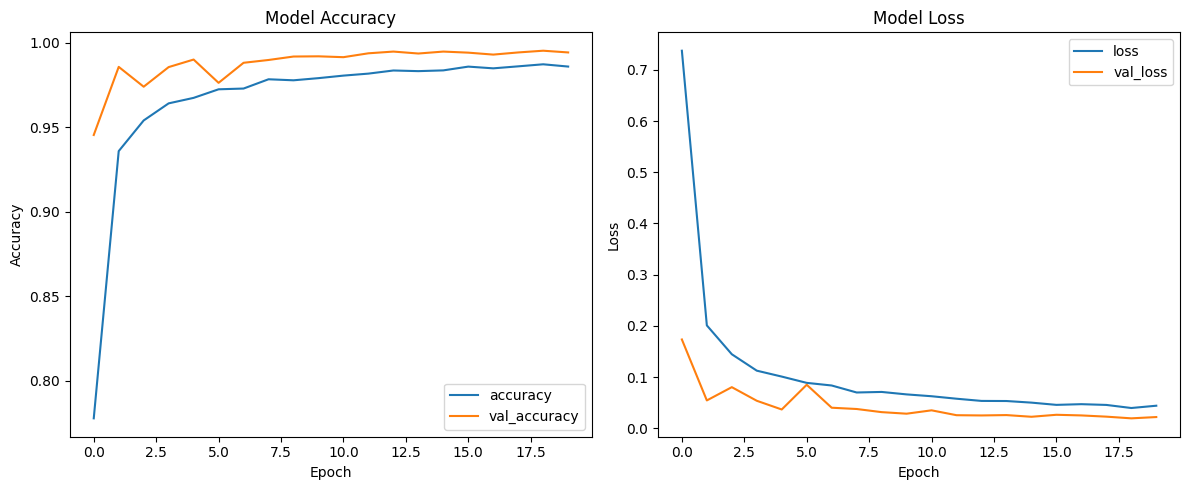

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # wider figure for side by side

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.title("Model Loss")

plt.tight_layout()
plt.show()


Sequential model was built and trained and achieved 99% accuracy